In [1]:
from base import MultiDiffusionPlotter, np
from threeD import Solver3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/Nutrients3D/"

# Absorption-Diffusion Timescales
Comparing the diffusion and absorption timescales for the non-dimensionalised **Steady State Diffusion-Absorption Equation**:
$$
\nabla^2 n(r) - \alpha n(r) c(r) = 0
$$
$$
\Rightarrow \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial n}{\partial r}\right)
    - \alpha n(r) c(r) = 0
$$
$r \in [R_{D}, R_{\infty}) \;\; | \;\; L_R := R_{\infty} - R_{D}$

Where, $R_{D}$ is the diatom radius, and $R_{\infty}$ is the radius of the domain, much larger than the diatom radius.

### Timescales

#### Absorption timescale

Following a similar approach to the 1D problem ([`1D-1_Absorption-diffusion_timescales`](1D-1_Absorption-diffusion_timescales.ipynb)), this time we have a radial domain that is much larger than the bacterial shell. Therefore, we cannot approximate the bacterial domain to be equivalent to the total domain, since we would have an absorption timescale that diverges to infinity. 
$\langle c \rangle \neq \frac{\int_{R_{D}}^{R_{\infty}} c(r) \cdot 4\pi r^2 \, dr}{\int_{R_{D}}^{R_{\infty}} 4\pi r^2 \, dr} \propto \frac{1}{R_{\infty}^3} \to 0$

$$
\langle c \rangle
    = \frac{\int_{\rho}^{\rho + \lambda} c(r) \cdot 4\pi r^2 \, dr}{\int_{\rho}^{\rho + \lambda} 4\pi r^2 \, dr}
    \overset{\star}{=} \frac{\mathcal{N}}{ \frac{4 \pi}{3}(\rho + \lambda)^3 - \rho^3}
    \overset{\star\star}{\approx}
    \begin{cases}
        \frac{3}{4 \pi \lambda^3}       & \lambda \gg \rho \\
        \frac{3}{4 \pi \rho^2 \lambda}  & \lambda \ll \rho
    \end{cases}
$$

- $\star$ Total number of diatoms constraint: $ \mathcal{N} = \int_{R_{D}}^{R_{\infty}} c(r) \cdot 4\pi r^2 \; dr = 1$

- $\star\star$ Specific cases, not generalised

$$
\tau_{\langle c \rangle}
        := \frac{1}{\alpha \langle c \rangle} = \frac{4 \pi}{3 \alpha} \left( [\rho + \lambda]^3 - \rho^3 \right)
        \overset{\lambda \gg \rho}{\approx} \frac{4 \pi}{3 \alpha} \lambda^3
$$

#### Diffusion timescale

We are interested in the local diffusion timescale, relevant when there is both absorption and diffusion. Setting the diffusion length to be the thickness of the diatom shell.
$$
\tau_d := \frac{\lambda^2}{{\color{purple}6}\cancel{D}}
$$

- ${\color{purple}6}$ appear due to the 3D geometry ($d=3$), It arrises from the mean square displacement $\langle \Delta^2 \rangle = 2d D \tau$, where $\Delta$ is the displacement made by the particle in time $\tau$.

#### Comparison
$$
\frac{\tau_{\langle c \rangle}}{\tau_d}
    = \frac{4 \pi}{3 \alpha} \left( [\rho + \lambda]^3 + \rho^3 \right) \cdot {\frac{6 \cancel{D}}{\lambda^2}}
    \overset{\lambda \gg \rho}{\approx} 8 \pi \frac{\lambda}{\alpha}
$$
___
$$
\frac{\tau_{c}}{\tau_{d}}
\begin{cases} 
    \ll 1,  &  \text{Absorption domination}  \\
    \sim 1, &  \text{Comparable timescales} \\
    \gg 1,  &  \text{Diffusion domination}
\end{cases}
$$

### Definitions & Values

In [2]:
def shell_generator(rho, lambda_):
    'Define the inner step function that takes r as parameter'
    def c_shell(r):
        'Determine the condition based on rho and lambda_'
        cond = (r >= rho) & (r <= rho + lambda_)
        c = 3/(4*np.pi) * 1/(lambda_**3 + 3 * lambda_**2 * rho + 3 * lambda_ * rho**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_shell

In [3]:
syst_params = {
    'R_dtm' : 1, 'R_inf' : 1000,
    'L' : 10, # Length of the plot domain
    'T_ratio' : None,
    'nr': 1_000_000,
    # Shell parameters
    'rho' : 2.5,
    'lambda' : 5
}

R_dtm, R_inf, L = syst_params['R_dtm'], syst_params['R_inf'], syst_params['L']

### Plots $\tau_c/\tau_d$ 📄

When $\color{red} \tau_c/ \tau_d \ll 1$, absorption dominates diffusion.

When $\color{red} \tau_c/ \tau_d \gg 1$, diffusion dominates absorption.

Diffusion
Tc/Td = 10.0
alpha = 25.13274122871834
Comparable
Tc/Td = 1.0
alpha = 251.32741228718348
Absorption
Tc/Td = 0.1
alpha = 2513.274122871834


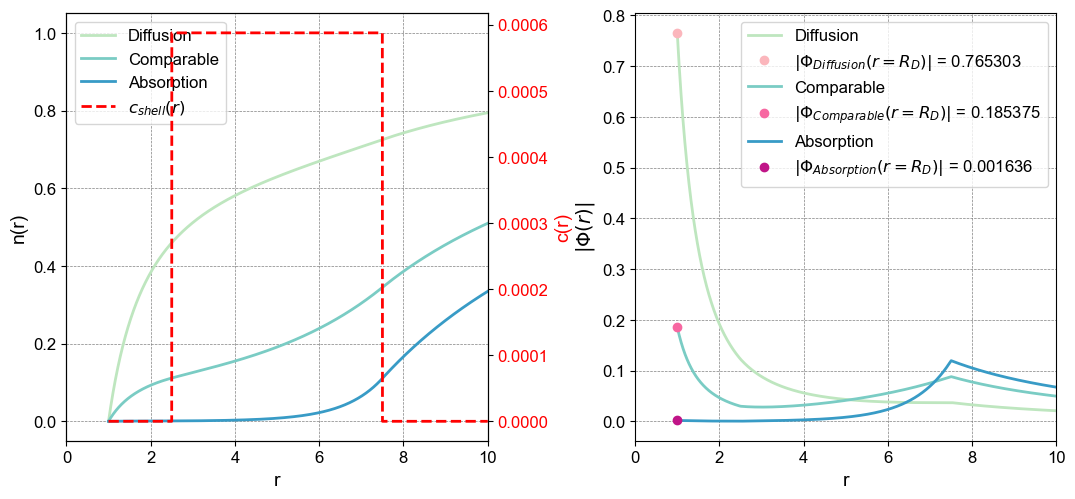

In [4]:
labels = ['Diffusion', 'Comparable', 'Absorption']
T_ratio_list = [1e1, 1e0, 1e-1]

n_list = []; f_list = []
for i, T_ratio in enumerate(T_ratio_list):
    syst_params['T_ratio'] = T_ratio
    c_shell = shell_generator(syst_params['rho'], syst_params['lambda'])
    S3D = Solver3D(syst_params, c_shell)
    S3D.ode.solve()
    n_list.append(S3D.ode.n); f_list.append(S3D.ode.abs_flux)

    print(labels[i])
    print(f"Tc/Td = {S3D.T_ratio}\nalpha = {S3D.alpha}")

plotter = MultiDiffusionPlotter(S3D)
plotter.double_plot(n_list, f_list, labels, xlim=(0, L))
plotter.save(figures_path, 'c_shell_thick(r)_comparison')

Diffusion
Tc/Td = 10.0
alpha = 25.13274122871834
Comparable
Tc/Td = 1.0
alpha = 251.32741228718348
Absorption
Tc/Td = 0.1
alpha = 2513.274122871834


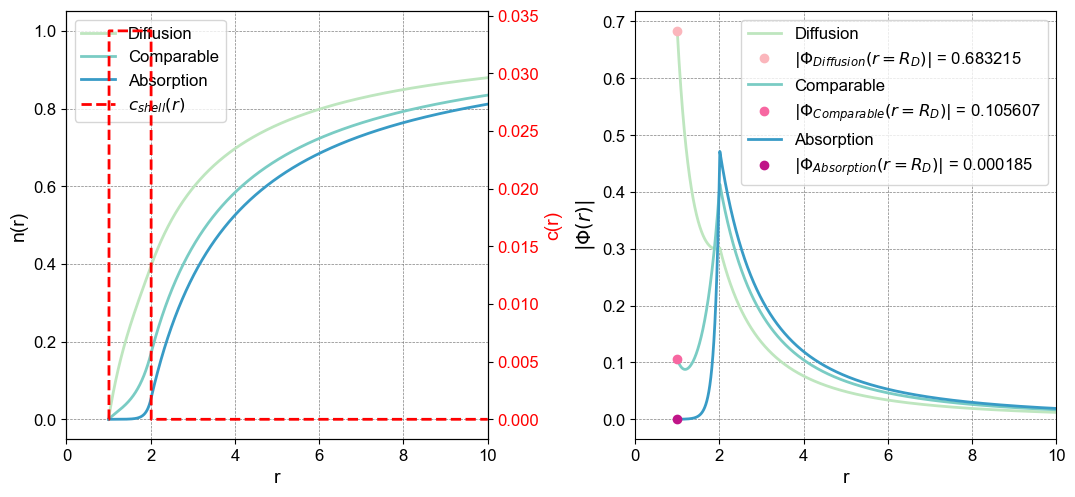

In [5]:
syst_params['rho'] = 1.01
syst_params['lambda'] = 1

n_list = []; f_list = []
for i, T_ratio in enumerate(T_ratio_list):
    syst_params['T_ratio'] = T_ratio
    c_shell = shell_generator(syst_params['rho'], syst_params['lambda'])
    S3D = Solver3D(syst_params, c_shell)
    S3D.ode.solve()
    n_list.append(S3D.ode.n); f_list.append(S3D.ode.abs_flux)

    print(labels[i])
    print(f"Tc/Td = {S3D.T_ratio}\nalpha = {S3D.alpha}")

plotter = MultiDiffusionPlotter(S3D)
plotter.double_plot(n_list, f_list, labels, xlim=(0, L))
plotter.save(figures_path, 'c_shell_thin(r)_comparison')